In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

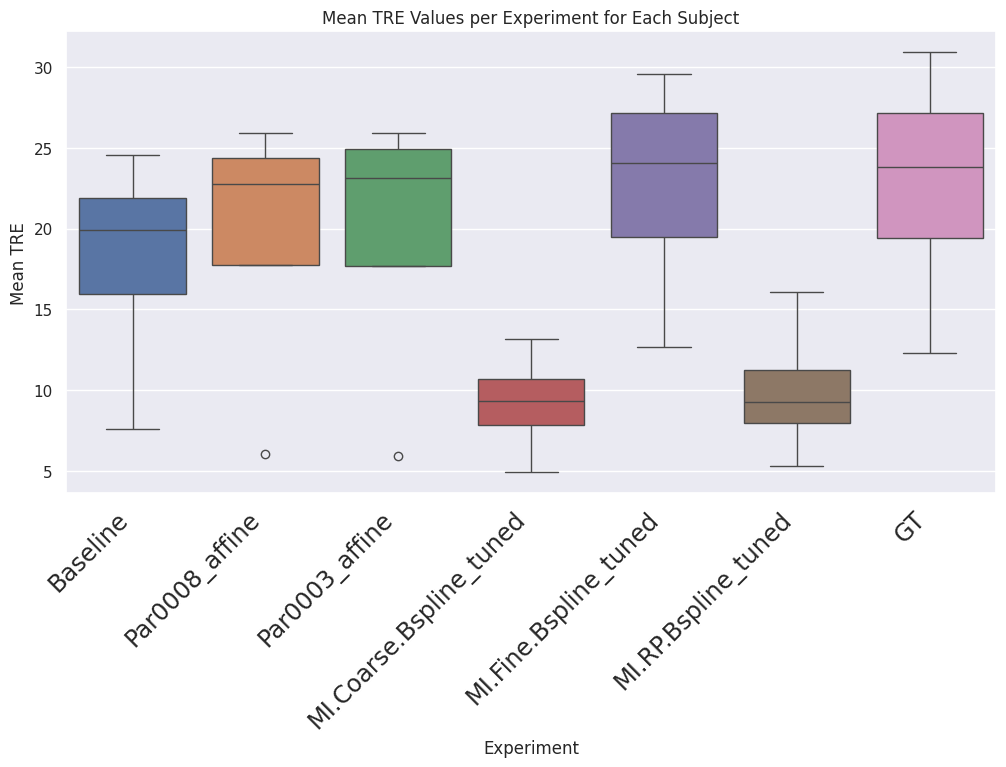

In [9]:
file_path = '../experiments/elastik/results.json'

with open(file_path, 'r') as file:
    data = json.load(file)

experiments = list(data.keys())
sns.set(style="darkgrid")
df = pd.DataFrame()
df = pd.concat([pd.DataFrame({'Experiment': experiment, 'Subject': subject, 'Mean_TRE': values['mean_tre']}, 
                             index=[0]) 
                for experiment in data 
                for subject, values in data[experiment].items()], ignore_index=True)
palette_colors = sns.color_palette("Paired", n_colors=len(df['Experiment'].unique()))
plt.figure(figsize=(12, 6))
sns.boxplot(x='Experiment', y='Mean_TRE',hue='Experiment',data=df)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.title('Mean TRE Values per Experiment for Each Subject')
plt.xlabel('Experiment')
plt.ylabel('Mean TRE')
plt.show()
